
#### <a id='e'></a>
<h1 style='background-color:#EF4026;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>Cancer Clustering Using KMeans </h1>

<div style="border-radius:10px; border:maroon solid; padding: 15px; background-color: #F5F5DC; font-size:110%; text-align:left">
<a id="contents_tabel"></a>
<h3 align="left"><font color='coral'>📌Table of Contents:</font></h3>

* [1 | Import neccessary libraries](#import)
* [2 | Our Dataset](#dataset)
* [3 | Preprocessing](#preprocessing)
    
     - [3.1 | Statistics summary of the dataframe](#statistics) 
* [4 | Missing Value Detection](#missingvalues)
* [5 | Duplicate Values Detection](#duplicates)
    
   
* [6 | KMeans with PCA](#kmean)

#### <a id='e'></a>
<h1 style='background-color:#EF4026;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>1 : Import Neccessary libraries </h1>

[📌 Table of Contents](#contents_tabel)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

import warnings 
warnings.filterwarnings("ignore")

<div style="border-radius:10px; border:maroon solid; padding: 15px; background-color: #F5F5DC; font-size:110%; text-align:left">

<h3 align="left"><font color='coral'>Introduction:</font></h3>

The data from this analysis is the file "train_label.tsv" contains information about the samples. Specifically, the column "X_primary_disease" tells you what kind of cancer a sample is (breast, lung squamous cell carcinoma, or lung adenocarcinoma).

   The goal of the project is to train a machine learning model using this data and predict a label for each sample in the file "test_data.tsv".

In [4]:
train_data = pd.read_csv(r'F:\train_data.tsv',sep='\t')
train_data = pd.DataFrame(train_data)

# sample label information
train_label = pd.read_csv(r'F:\train_label.tsv',sep='\t')
train_label = pd.DataFrame(train_label)

In [5]:
train_data 

,Unnamed: 0,S1343,S1344,S1345,S1348,S135,S1353,S1354,S1355,S1356,...,S990,S991,S992,S993,S994,S995,S996,S997,S998,S999
0,A1BG,6.86,7.65,7.45,6.84,7.67,5.12,7.88,6.76,8.19,...,6.95,7.08,9.20,6.83,4.79,6.10,6.81,6.84,6.45,5.63
1,A1CF,0.51,0.50,0.00,0.00,0.55,0.34,0.00,0.00,0.00,...,0.00,0.00,0.00,3.64,0.00,0.00,0.66,0.00,0.00,0.00
2,A2M,12.27,13.95,13.86,13.55,14.80,13.21,13.30,14.00,13.72,...,12.97,13.59,12.73,15.77,12.94,16.86,15.99,13.54,14.34,14.40
3,A2ML1,12.04,5.07,2.47,1.52,7.57,7.58,1.08,1.11,2.01,...,7.71,2.14,1.09,1.62,10.39,7.10,3.73,9.10,2.51,6.17
4,A4GALT,6.74,9.18,8.59,6.35,8.88,6.87,6.53,8.34,9.55,...,7.24,6.33,7.59,9.88,7.61,7.79,8.30,9.69,8.69,9.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16335,ZYG11A,8.25,5.70,5.50,6.78,6.59,7.70,4.85,2.03,5.76,...,4.70,5.50,6.34,1.03,7.03,6.52,2.34,8.33,3.48,6.50
16336,ZYG11B,9.40,9.34,9.28,10.62,9.25,10.11,9.45,9.37,9.50,...,9.58,10.00,9.54,9.67,9.74,10.56,9.72,10.45,10.14,10.28
16337,ZYX,11.30,12.98,13.72,11.14,12.50,11.69,10.77,11.51,11.68,...,10.87,11.54,11.93,12.66,10.77,13.27,12.88,11.67,11.72,11.92
16338,ZZEF1,10.70,10.21,10.28,10.79,9.95,9.76,10.01,11.06,9.90,...,9.40,10.22,10.02,10.30,10.21,10.81,10.73,10.48,9.88,9.72


In [6]:
train_label

,Unnamed: 0,id,sample_type,X_primary_disease
0,S1343,S1343,Primary Tumor,breast invasive carcinoma
1,S1344,S1344,Primary Tumor,breast invasive carcinoma
2,S1345,S1345,Primary Tumor,breast invasive carcinoma
3,S1348,S1348,Primary Tumor,breast invasive carcinoma
4,S135,S135,Primary Tumor,breast invasive carcinoma
...,...,...,...,...
1509,S995,S995,Primary Tumor,breast invasive carcinoma
1510,S996,S996,Primary Tumor,lung adenocarcinoma
1511,S997,S997,Primary Tumor,breast invasive carcinoma
1512,S998,S998,Primary Tumor,lung adenocarcinoma


### Transpose rows and columns

In [7]:
samples = train_data.columns.values
X = train_data.to_numpy().transpose()
features = X[0]
X = pd.DataFrame(X[1:,], columns = features, index = samples[1:])
X

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
S1343,6.86,0.51,12.27,12.04,6.74,0.89,9.5,10.2,0.0,0.0,...,8.87,9.99,5.19,7.86,10.04,8.25,9.4,11.3,10.7,9.35
S1344,7.65,0.5,13.95,5.07,9.18,0.0,9.55,9.45,5.03,0.0,...,8.48,9.3,5.51,8.26,10.06,5.7,9.34,12.98,10.21,9.39
S1345,7.45,0.0,13.86,2.47,8.59,0.5,9.75,9.93,0.87,0.0,...,8.36,7.78,5.45,8.39,9.95,5.5,9.28,13.72,10.28,9.67
S1348,6.84,0.0,13.55,1.52,6.35,0.0,9.38,9.56,0.0,0.0,...,8.65,8.28,6.7,9.46,10.71,6.78,10.62,11.14,10.79,10.42
S135,7.67,0.55,14.8,7.57,8.88,0.55,9.27,10.01,1.91,0.0,...,8.73,10.13,5.43,8.44,9.51,6.59,9.25,12.5,9.95,9.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S995,6.1,0.0,16.86,7.1,7.79,0.66,8.75,9.0,0.37,0.0,...,9.63,9.45,4.94,8.23,9.93,6.52,10.56,13.27,10.81,10.34
S996,6.81,0.66,15.99,3.73,8.3,3.79,9.31,9.25,6.51,0.0,...,7.54,7.78,5.66,8.46,10.11,2.34,9.72,12.88,10.73,8.98
S997,6.84,0.0,13.54,9.1,9.69,0.93,9.57,10.15,4.74,2.96,...,8.4,9.62,5.16,8.48,9.68,8.33,10.45,11.67,10.48,10.72
S998,6.45,0.0,14.34,2.51,8.69,1.74,9.64,10.1,6.09,0.0,...,7.53,8.18,5.93,8.84,9.98,3.48,10.14,11.72,9.88,9.27


<h1 style='background-color:#EF4026;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>3 : Preprocessing</h1>

[📌 Table of Contents](#contents_tabel)

<a id="bivariate_cat"></a>
# <b><span style='color:black'>3.1 |</span><span style='color:orange'> Statistics summary of the dataframe</span></b>

In [9]:
X.describe(include="all")

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
count,1514.00,1514.0,1514.00,1514.0,1514.00,1514.0,1514.00,1514.00,1514.0,1514.0,...,1514.00,1514.00,1514.00,1514.00,1514.0,1514.0,1514.00,1514.00,1514.00,1514.00
unique,498.00,128.0,474.00,750.0,537.00,258.0,227.00,306.00,616.0,258.0,...,310.00,404.00,308.00,327.00,238.0,631.0,248.00,319.00,287.00,272.00
top,7.43,0.0,13.26,0.0,9.18,0.0,9.69,9.83,0.0,0.0,...,8.75,9.39,5.95,8.82,10.2,0.0,9.83,11.94,9.87,9.38
freq,11.00,1232.0,13.00,167.0,11.00,458.0,20.00,19.00,370.0,1109.0,...,17.00,12.00,16.00,17.00,26.0,10.0,21.00,15.00,17.00,21.00


#### <a id='e'></a>
<h1 style='background-color:#EF4026;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>4 : Missing Value Detection</h1>

[📌 Table of Contents](#contents_tabel)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1514 entries, S1343 to S999
Columns: 16340 entries, A1BG to ZZZ3
dtypes: object(16340)
memory usage: 188.8+ MB


In [11]:
pd.DataFrame(X.isnull().sum(), columns= ['Number of missing values']) #Any missing values.

,Number of missing values
A1BG,0
A1CF,0
A2M,0
A2ML1,0
A4GALT,0
...,...
ZYG11A,0
ZYG11B,0
ZYX,0
ZZEF1,0


#### <a id='e'></a>
<h1 style='background-color:#EF4026;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>5 : Duplicate Values Detection</h1>

[📌 Table of Contents](#contents_tabel)

In [13]:
#check whether there is any duplicate value
X[X.duplicated()]

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3


In [95]:
y = train_label.drop(columns = ["Unnamed: 0","id","sample_type"])
y = y.set_index(samples[1:])
y

,X_primary_disease
S1343,breast invasive carcinoma
S1344,breast invasive carcinoma
S1345,breast invasive carcinoma
S1348,breast invasive carcinoma
S135,breast invasive carcinoma
...,...
S995,breast invasive carcinoma
S996,lung adenocarcinoma
S997,breast invasive carcinoma
S998,lung adenocarcinoma


In [96]:
y.nunique()

X_primary_disease    3
dtype: int64

In [97]:
print(y['X_primary_disease'].unique())

['breast invasive carcinoma' 'lung squamous cell carcinoma'
 'lung adenocarcinoma']


### Replace names of Cancers with [0,1,2]

In [98]:
for i in range(0,(len(samples[1:]))):
    if y.iat[i,0] == 'breast invasive carcinoma':
        y.iat[i,0] = 0
    elif y.iat[i,0] == 'lung squamous cell carcinoma':
        y.iat[i,0] = 1
    else:
        y.iat[i,0] = 2

In [99]:
y = list(y.iloc[:,0])

### Training dataset

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

### Sample label information

In [101]:
test_data = pd.read_csv(r"F:\test_data.tsv",sep='\t')
test_data

,Unnamed: 0,S1,S1001,S1005,S1006,S1012,S1020,S1021,S1037,S1039,...,S133,S1332,S1333,S1334,S1335,S1336,S1337,S1338,S134,S1342
0,A1BG,7.60,6.84,6.12,5.86,6.05,5.62,6.00,5.74,6.71,...,8.22,6.77,7.62,6.73,5.66,6.11,6.90,7.95,6.03,5.89
1,A1CF,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.07,0.32,0.00,0.00,0.00,0.00,0.00
2,A2M,12.28,12.27,12.55,10.79,11.80,9.82,10.88,11.42,12.05,...,11.97,14.42,11.95,12.91,13.77,12.96,13.87,13.20,13.75,13.11
3,A2ML1,9.02,11.08,13.00,8.50,8.46,6.18,14.59,10.08,10.11,...,0.98,0.59,0.53,7.20,9.76,5.54,5.76,0.98,0.38,10.73
4,A4GALT,10.47,8.06,10.97,10.98,8.77,9.18,10.88,12.00,9.80,...,9.00,9.44,5.67,7.46,6.74,7.07,9.28,7.74,7.28,5.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16335,ZYG11A,3.70,3.77,3.95,5.32,7.26,3.44,5.40,4.01,2.99,...,6.93,6.23,2.75,6.91,6.03,5.67,7.13,7.74,6.18,8.42
16336,ZYG11B,9.52,8.90,10.01,8.98,9.71,9.46,8.95,8.75,9.27,...,9.04,10.06,9.26,9.53,10.19,9.42,9.41,10.46,10.04,9.71
16337,ZYX,10.59,11.79,11.38,12.91,11.55,12.51,11.55,11.87,11.14,...,11.29,11.72,9.85,12.01,11.89,10.60,11.97,11.33,11.04,11.68
16338,ZZEF1,10.27,9.81,10.31,9.90,9.98,10.55,9.19,9.04,8.45,...,9.64,10.94,10.59,10.43,10.42,11.03,9.49,9.64,11.03,9.99


### Transpose rows and columns

In [102]:
test_samples = test_data.columns.values
test_data = test_data.to_numpy().transpose()
test_features = list(test_data[0])
test_data = pd.DataFrame(test_data[1:,], columns = test_features, index = test_samples[1:])
test_data

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
S1,7.6,0.53,12.28,9.02,10.47,1.69,9.77,9.69,5.66,3.43,...,8.23,8.77,6.81,8.83,11.08,3.7,9.52,10.59,10.27,10.53
S1001,6.84,0.0,12.27,11.08,8.06,0.49,9.8,9.2,10.47,9.78,...,9.78,9.78,5.11,8.14,11.99,3.77,8.9,11.79,9.81,9.52
S1005,6.12,0.0,12.55,13.0,10.97,2.16,9.5,10.62,7.22,2.64,...,8.58,10.5,5.09,8.33,10.52,3.95,10.01,11.38,10.31,9.29
S1006,5.86,0.0,10.79,8.5,10.98,0.0,9.71,8.72,7.06,0.0,...,9.55,10.73,4.24,8.22,10.41,5.32,8.98,12.91,9.9,9.59
S1012,6.05,0.0,11.8,8.46,8.77,0.0,10.08,10.21,3.87,0.0,...,8.51,10.17,6.43,8.93,10.7,7.26,9.71,11.55,9.98,9.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1336,6.11,0.0,12.96,5.54,7.07,0.0,8.59,9.76,0.0,0.0,...,9.32,10.45,5.91,9.03,10.02,5.67,9.42,10.6,11.03,9.77
S1337,6.9,0.0,13.87,5.76,9.28,0.0,9.28,9.71,0.82,0.0,...,8.78,9.95,5.87,9.01,9.85,7.13,9.41,11.97,9.49,10.16
S1338,7.95,0.0,13.2,0.98,7.74,0.98,9.83,10.57,0.0,0.0,...,9.52,10.65,5.98,8.85,9.88,7.74,10.46,11.33,9.64,10.63
S134,6.03,0.0,13.75,0.38,7.28,0.0,9.05,9.9,0.0,0.0,...,8.59,8.91,6.35,9.58,10.21,6.18,10.04,11.04,11.03,10.12


<a id="bivariate_cat"></a>
# <b><span style='color:black'></span><span style='color:orange'> LogisticRegression</span></b> 


In [103]:
LR = LogisticRegression(random_state=0, solver='sag', multi_class='multinomial', max_iter=1000).fit(X_train, y_train)

In [104]:
LR.predict(test_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [105]:
LR.predict(X_test)
round(LR.score(X_test,y_test), 4)

0.9736

In [106]:
LR.predict(X_test)

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2,
       0, 1, 1, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 2, 2, 1,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 1, 1, 0, 2, 0,
       1, 0, 0, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0,
       0, 2, 2, 2, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0,
       2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,

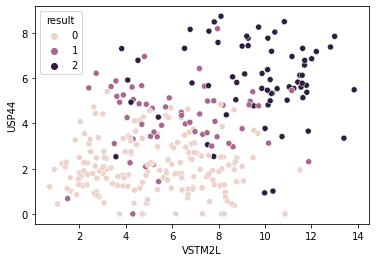

<Figure size 1080x1080 with 0 Axes>

In [107]:
df = X_test
df['result'] = y_test
sns.scatterplot(data=df, y="USP44", x="VSTM2L", hue='result')
plt.figure(figsize=(15,15))
plt.show()

In [109]:
# get importance
importance = LR.coef_
# final 300 features
final_features = list()
final_features_val = list()
# select 100 top features for each cluster
selected_features = list()
selected_features_values = list()

### breast invasive carcinoma

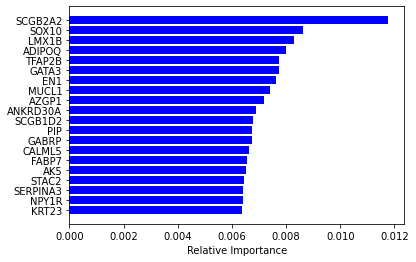

In [110]:
# plot feature importance
features = X.columns
indices = np.argsort(importance)[0,-20:]  # top 20 features
plt.barh(range(len(indices)), importance[0,indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
indices = np.argsort(importance)[0,-100:]
for i in range(0,len(indices)):
    selected_features.append(features[indices[i]])
    selected_features_values.append(importance[0,indices[i]])
final_features = np.append(final_features, selected_features)
final_features_val = np.append(final_features_val, selected_features_values)

### breast invasive carcinoma

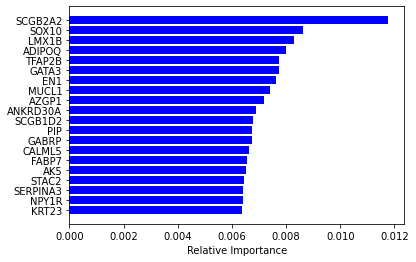

In [111]:
# plot feature importance
features = X.columns
indices = np.argsort(importance)[0,-20:]  # top 20 features
plt.barh(range(len(indices)), importance[0,indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
indices = np.argsort(importance)[0,-100:]
for i in range(0,len(indices)):
    selected_features.append(features[indices[i]])
    selected_features_values.append(importance[0,indices[i]])
final_features = np.append(final_features, selected_features)
final_features_val = np.append(final_features_val, selected_features_values)

### lung squamous cell carcinoma

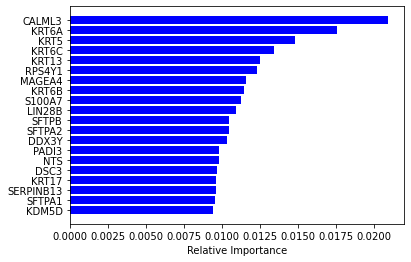

In [112]:
# plot feature importance
selected_features = list()
selected_features_values = list()
features = X.columns
indices = np.argsort(importance)[1,-20:]  # top 20 features
plt.barh(range(len(indices)), importance[1,indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
# axes[0].set_title('Feature Importances ')
plt.show()

indices = np.argsort(importance)[1,-100:]
for i in range(0,len(indices)):
    selected_features.append(features[indices[i]])
    selected_features_values.append(importance[1,indices[i]])
final_features = np.append(final_features, selected_features)
final_features_val = np.append(final_features_val, selected_features_values)

### lung adenocarcinoma

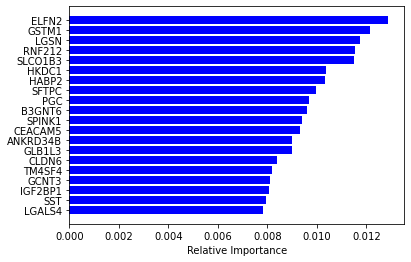

In [113]:
# plot feature importance
selected_features = list()
selected_features_values = list()
features = X.columns
indices = np.argsort(importance)[2,-20:]  # top 20 features
plt.barh(range(len(indices)), importance[2,indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
# axes[0].set_title('Feature Importances ')
plt.show()

indices = np.argsort(importance)[2,-100:]
for i in range(0,len(indices)):
    selected_features.append(features[indices[i]])
    selected_features_values.append(importance[2,indices[i]])
final_features = np.append(final_features, selected_features)
final_features_val = np.append(final_features_val, selected_features_values)

In [114]:
len(final_features)

500

In [115]:
final_features_pd = pd.DataFrame(data=final_features_val, columns=["correlation"], index=final_features)
final_features_pd

,correlation
ST8SIA6,0.003856
SYCP2,0.003864
WNK4,0.003890
CPA4,0.003954
CIDEC,0.003974
...,...
SLCO1B3,0.011494
RNF212,0.011555
LGSN,0.011746
GSTM1,0.012136


In [116]:
# drop duplicated features
final_columns = list(final_features_pd.index.drop_duplicates())

X_train = X_train[X_train.columns.intersection(final_columns)]
X_test = X_test[X_test.columns.intersection(final_columns)]
test_data = test_data[test_data.columns.intersection(final_columns)]

In [117]:
LR1 = LogisticRegression(random_state=0, solver='sag', multi_class='multinomial', max_iter=100).fit(X_train, y_train)

In [118]:
LR1.predict(X_test)
round(LR1.score(X_test,y_test),4)

0.9736

In [119]:
result = pd.DataFrame(LR1.predict(test_data), columns=['result'], index = test_data.index)

result_name = list()

In [120]:
# replace integers with names
for i in range(0,(len(result))):
    if int(result.iat[i,0]) == 0:
        result_name = np.append(result_name,'breast invasive carcinoma')
    elif int(result.iat[i,0]) == 1:
        result_name = np.append(result_name,'lung squamous cell carcinoma')
    else:
        result_name = np.append(result_name, "lung adenocarcinoma")

In [121]:
result = pd.DataFrame(result_name, columns=['result'], index = test_data.index)

In [122]:
result

,result
S1,lung squamous cell carcinoma
S1001,lung squamous cell carcinoma
S1005,lung squamous cell carcinoma
S1006,lung squamous cell carcinoma
S1012,lung squamous cell carcinoma
...,...
S1336,breast invasive carcinoma
S1337,breast invasive carcinoma
S1338,breast invasive carcinoma
S134,breast invasive carcinoma


In [123]:
result.to_csv('ML_predict_MaralKarbaschi.csv')

#### <a id='e'></a>
<h1 style='background-color:#EF4026;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>  6: KMeans</h1>

[📌 Table of Contents](#contents_tabel)

In [127]:
kmean_set = {"init":"random","n_init":10,"max_iter":300,"random_state":1}

In [129]:
kmeans = KMeans(n_clusters=4, **kmean_set )
kmeans.fit(X_train)
labels = kmeans.labels_
labels

array([3, 0, 2, ..., 0, 3, 1])

<h2 align="left"><font color='orange'>The End!</font></h2>